# Project 3 - Regression

In the US, driving is an everyday, inescapable part of life. Without a car, anyone who doesn't live in or near the heart of a city struggles to exist and thrive within this country. As someone who grew up in Europe, this got me thinking about cars, being both someone who drives and interested in automobiles to begin with. 

Now, when I say interested, I was mostly curious about the environmental effects of different cars and how efficient these great, hulking beasts that make up the backbone of America are. Pushing past that, I got to wondering if there was a way to find out which parts of a car make it more or less efficient, and if it is possible to predict exactly how efficient a vehicle can be based on its different parts.

Introduction:

The Dataset I will be using is one that tracks the miles per gallon of different cars, from different years and companies. The dataset itself tracks 8 variables per entry, those being mpg, number of cylinders, engine displacement, how much horsepower the engine produces, vehicle weight, model year, country of origin (numerical value), and lastly, the name of each vehicle tracked.

First off, in terms of pre-processing, we'll be doing a bit of cutting down on the dataset so we have less variables to keep track of. Since we are trying to find out how the different parts of a car make it more or less efficient, the names of each vehicle don't really matter to us, and neither does the country of origin, allowing us to create a subset of just the numerical values we need.

Considering we are using regression models to experiment here, we must dive into a vital question: What is regression?
Regression is a type of learning used to predict continous, numerical values. In this case, since we are trying to predict how efficient a car is (miles per gallon), regression is the perfect way to figure out which features of cars are important to affecting mpg and predicting what to focus on for real world application.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Turn csv file into data frame
auto_mpg = pd.read_csv("auto-mpg.csv")
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
numerics = auto_mpg[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"]]
numerics.head()

# Replacing filler values with NaN, then filling the NaN values with medians.
numerics.replace('?', np.nan, inplace=True)

numerics = numerics.apply(pd.to_numeric)

cols = numerics.select_dtypes(include=[np.number]).columns

numerics[cols] = numerics[cols].fillna(numerics[cols].median())

C:\Users\valni\AppData\Local\Temp\ipykernel_76588\1811848719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerics.replace('?', np.nan, inplace=True)


A little bit more cleaning was done here, as after a closer look I found there were some entries in the dataset that had filler values set as a question mark (?), so I had to replace those with NaN values, then replace said NaN values with the median of the values of whatever column the question marks were. This way, I manage to not sway the data while achieving the results I want.

This closer look also helped me understand my data a bit better, and see some basic patterns that are more globally relevant and have to do with external factors than individual things on a car. For example, newer cars are generally a bit better in terms of performance and efficiency, but that has more to do with the developing technology of the time and the constant innovation, especially during the cold war which is when our dataset has taken vehicle data from, ranging from the mid 70s to the 80s for car models.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = numerics.drop('mpg', axis=1)
y = numerics["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linearMod = LinearRegression()

linearMod.fit(X_train, y_train)

y_pred = linearMod.predict(X_test)

The next part I focused on was getting a regressor model up and running, starting with a simple Linear Regression model, which tries to find linear relationships between each feature and the mpg of each car. This model also reduces multicollinearity, which shows how important each feature is individually to the mpg. Moving forward, we have some of the evaluations for the model, and some visualizations about which features are the most vital in this model.

In [5]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R^2 : {r2:.3f}")

MAE : 2.47
RMSE : 3.07
R^2 : 0.824


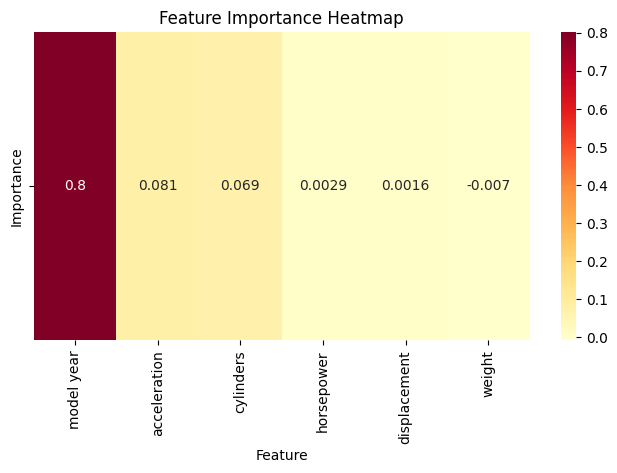

In [6]:
importances = linearMod.coef_
features = X.columns

feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,4))
sns.heatmap(feat_imp_df.set_index('Feature').T, annot=True, cmap='YlOrRd')
plt.title("Feature Importance Heatmap")
plt.show()

Our evaluations here show good signs! A high R^2 score is a very good thing to see, showing that our model is doing a great job of explaining the variance when it comes to mpg. Our MAE and RMSE numbers are also looking decent! RMSE showing how our predictions are compared to the average mpg, usually off by about 3 MPG, and MAE is slightly lower, as it should be since Mean Absolute Error isn't quite as affected by outliers, which are not bad signs at all for our model! All things considered, modern MPG range from 19 to above 40 in certain cars, our model is doing a fantastic job.

Moving forward, I'd decided to try a different model to experiment with, and I wanted to see if it was telling us something different. For this, I decided on a simple Random Forest model, since we are dealing with multiple features, and wanted to see which is the more accurate in terms of predicting mpg, as well as how the models differ.

In [7]:
# Imported the Random Forest above, with the LinearRegression, because I jumped the gun on the forest.
#Using same train test split as before

rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1, max_depth=None)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [8]:
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R^2 : {r2:.3f}")

MAE : 1.65
RMSE : 2.24
R^2 : 0.907


As mentioned above, since we have multiple features, I originally assumed a RF model would do a bit of a better job of predicting values for this experiment, and it seems my hypothesis has turned out correct! As we can see, the R^2 is higher by about 5%, showing the RF model is better at predicting values, and the variation is much smaller than the Linear Regression model, with RMSE and MAE scores both being about 8 tenths lower on the Random Forest.

Moving forward, I decided on one last experiment, this time changing up the target variable. I wanted to see if we could nail which year a given car is made in, based off of the car's features, so the only real change we'd be making here is switching out our y variable for one of the x variables. While pretty simple on the surface, it does take some reworking to get this experimented sorted in the pre-processing, in terms of assigning X columns and a target variable, following which we will use a Random Forest regressor (due to its higher accuracy) to see how well we can predict when a car is made.

In [10]:
# As discussed above, some of the steps require reworking variable positions, and that includes redoing
# the train test split as a whole.

# To not mess with legibility, we will be adding a '3' to the variable names, to distinguish these as just
# for this last experiment.

X3 = numerics.drop('model year', axis=1)
y3 = numerics["model year"]

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

rf3 = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1, max_depth=None)
rf3.fit(X_train_3, y_train_3)

y_pred_3 = rf3.predict(X_test_3)

In [11]:
mae3 = mean_absolute_error(y_test_3, y_pred_3)
rmse3 = np.sqrt(mean_squared_error(y_test_3, y_pred_3))
r2_3 = r2_score(y_test_3, y_pred_3)

print(f"MAE : {mae3:.2f}")
print(f"RMSE : {rmse3:.2f}")
print(f"R^2 : {r2_3:.3f}")

MAE : 1.95
RMSE : 2.45
R^2 : 0.630


Here we see a start difference, with a large drop in R^2 scored, showing that our model is not as adept at predicting model year based on the rest of the vehicle's features. This has no real world impact, considering it would be more akin to a trivia game question, but was an interesting experiment to try out nonetheless!

All that being said, why does any of this matter??

I would argue that these models and experiments are quite important in telling us how efficient our vehicles are, and play a large part of making cars both more efficient and higher-performing, which is a massive boon to innovation as a whole, since a lot of technology that goes in cars is used in different everyday gadgets. Alongside that, being able to figure out what is causing cars to be more or less efficient goes a long way in making our environmental impact on the planet less harmful, and I can think of no nobler cause than the preservation of the world around us.

On a similar note, car companies know that people want to take care of and preserve the planet, and models like this are what allow them to make better cars, and therefore make more money from sales while including higher customer base retention. After all, a happy customer is a returning customer.

## Conclusion:

It is very possible and very helpful to predict and find out what makes cars efficient, and using models like these to curb the harmful impacts that cars can have on our environment goes a long way in both innovation and preservation of our planet. Regressor models can be used for many similar cases, and regularly are, showing that we can and should strive to improve upon what exists to the best of our abilities, be it cars or something entirely different.

References:

https://www.geeksforgeeks.org/machine-learning/dataset-for-linear-regression/

https://www.geeksforgeeks.org/machine-learning/random-forest-regression-in-python/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

A bit of help from chatgpt as well.